In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import plotly as ply
import numpy as np
# import seaborn as sb
import pandas as pd

from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff
import plotly.graph_objs as go

init_notebook_mode(connected=True)
np.set_printoptions(linewidth=180)

In [2]:
data = pd.read_csv('group1_data.csv')

In [3]:
data = data[['x1', 'x2', 'x3', 'x4', 'Category']]

header = ['X1', 'X2', 'X3', 'X4', 'Category']
data.columns = header
print(data.shape)

(635, 5)


In [4]:
data.head()

,X1,X2,X3,X4,Category
0,0.000047,1.045443,0.221220,0.054862,B
1,0.000380,0.245713,0.059157,1.039724,B
2,0.000783,0.499212,0.454019,0.155986,A
3,0.001390,0.172248,1.052486,0.086613,B
4,0.001949,0.010010,0.280901,1.032420,B


In [5]:
assert(np.all(data.iloc[:, 0:4].columns.values == ['X1', 'X2', 'X3', 'X4']))
data['Radius'] = np.linalg.norm(data.iloc[:, 0:4], axis=1)
data['norm_1'] = np.linalg.norm(data.iloc[:, 0:4], ord=1, axis=1)
data['norm_inf'] = np.linalg.norm(data.iloc[:, 0:4], ord=np.infty, axis=1)

In [6]:
data.head()

,X1,X2,X3,X4,Category,Radius,norm_1,norm_inf
0,0.000047,1.045443,0.221220,0.054862,B,1.070000,1.321572,1.045443
1,0.000380,0.245713,0.059157,1.039724,B,1.070000,1.344974,1.039724
2,0.000783,0.499212,0.454019,0.155986,A,0.692588,1.110000,0.499212
3,0.001390,0.172248,1.052486,0.086613,B,1.070000,1.312736,1.052486
4,0.001949,0.010010,0.280901,1.032420,B,1.070000,1.325281,1.032420


In [7]:
Adata = data[ data.Category == 'A' ]
Bdata = data[ data.Category == 'B' ]

Acolor = '#636efa'
Bcolor = '#19d3f3'

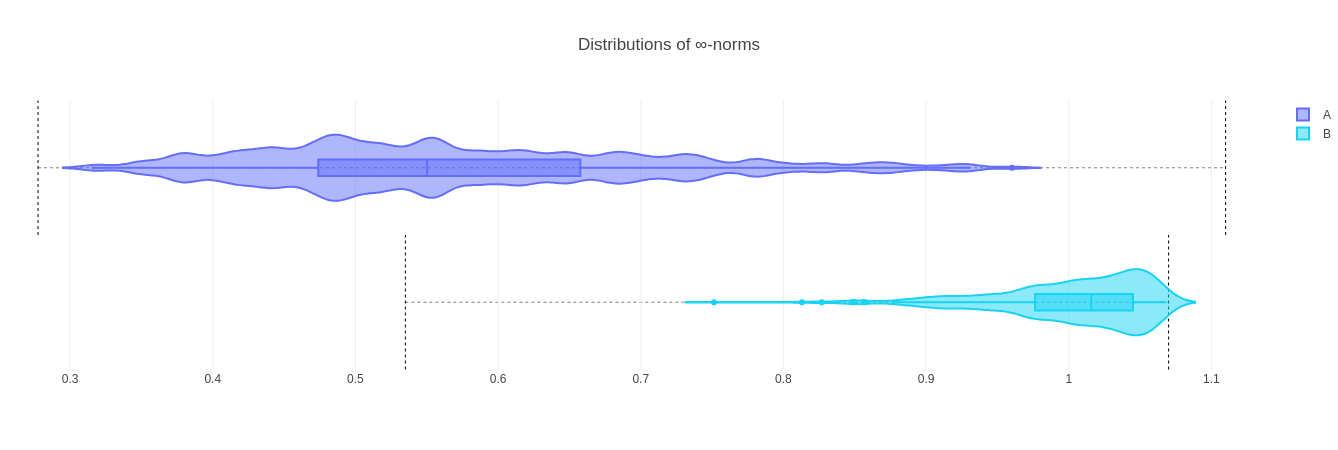

In [8]:
fig = { 'data': [
    go.Violin(
        x = d.iloc[:,0:4].max(axis=1),
#         y = d.Category,
        y0 = y0,
        bandwidth = 1e-2,
        name = d.Category.iloc[0],
        marker = go.violin.Marker(color=c),
        orientation = 'h',
        box = {'visible': True}
    ) for d,c,y0 in ((Adata, Acolor, 1), (Bdata, Bcolor, 0)) ],
#         ) for d,c in ((Bdata, 'green'),) ],
'layout': {
    'title': 'Distributions of ∞-norms',
    'yaxis': {
        'visible': False
    },
    'shapes': [
        {
            'type': 'line',
            'layer': 'below',
            'x0': x, 'x1': x, 'y0': y-.5, 'y1': y+.5,
            'line': {
                'width': 1,
                'dash': 'dot'
            }
        } for x,y in ( (0.2775, 1.), (1.11, 1.), (1.07, 0.), (0.535, 0.) ) ] + [
        {
            'type': 'line',
            'layer': 'below',
            'x0': x0, 'x1': x1, 'y0': y, 'y1': y,
            'line': {
                'width': 0.5,
                'dash': 'dot'
            }
        } for x0,x1,y in ( (0.2775, 1.11, 1.), (0.535, 1.07, 0.) ) ],
    'autosize': False,
    'width': 1000,
    'margin': {
        'l': 0,
        'r': 0
    }
} }

ply.offline.iplot(fig, validate=False, filename='Violin_infty_norms.png')

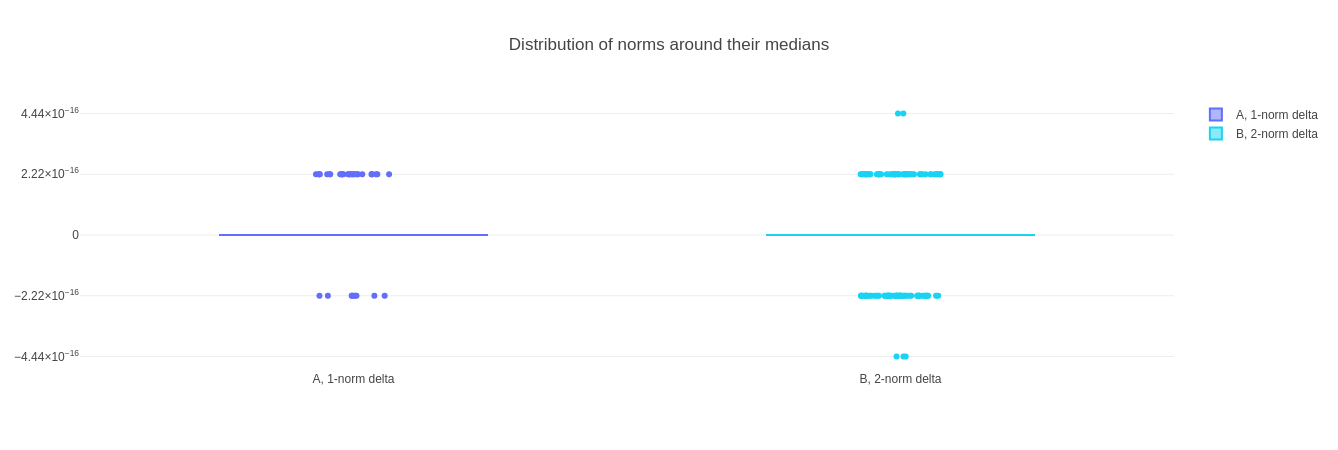

In [9]:
fig = { 'data': [
       go.Box(
           y = y-y.median(),
           name = tit,
           marker = go.box.Marker(color = c),
           boxpoints = 'outliers',
           jitter = 0.3
       ) for y,tit,c in ((Adata.norm_1, 'A, 1-norm delta', Acolor),
                         (Bdata.Radius, 'B, 2-norm delta', Bcolor))],
       'layout': {
           'title': 'Distribution of norms around their medians',
           'yaxis': {
               'dtick': 2**-52,
               'zeroline': False
           },
           'autosize': False,
           'width': 1000
       }
}

ply.offline.iplot(fig, validate=False, filename='Boxplot_norms_distr.png')

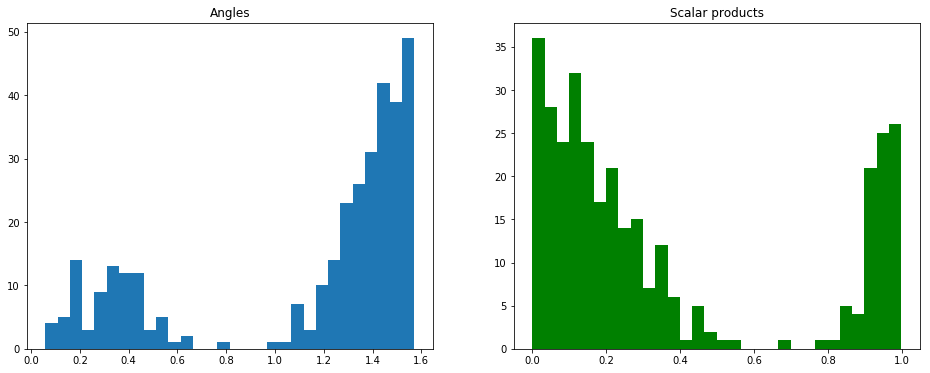

In [10]:
delme = Bdata

fig, ax = plt.subplots(ncols=2, figsize=(16, 6))
ax[0].hist(np.arccos(delme.X1/delme.Radius), bins=30)
ax[0].set_title('Angles')
ax[1].hist((delme.X1/delme.Radius), bins=30, color='green')
ax[1].set_title('Scalar products')
None

In [11]:
Bdata_sep = [Bdata[Bdata.iloc[:,i] == Bdata.norm_inf] for i in range(4)]

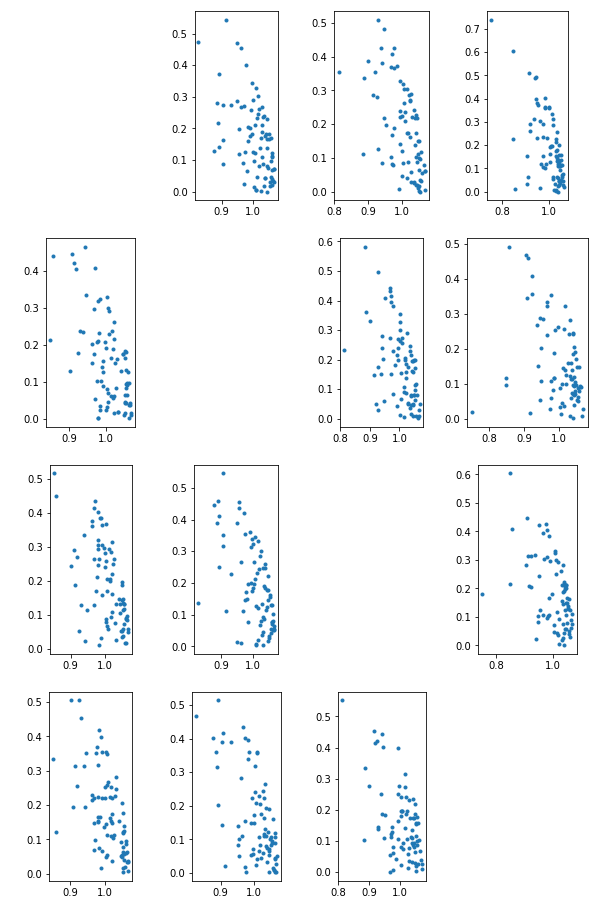

In [12]:
from itertools import product
fig, axs = plt.subplots(4,4, figsize=(10,16))
for i,j in product(range(4), range(4)):
    ax = axs[j, i]; d = Bdata_sep[i]
    if i == j:
        ax.axis('off')
    else:
        ax.set_aspect('equal')
        ax.plot(d.iloc[:,i], d.iloc[:,j], '.')

In [13]:
from itertools import product
idx_map = np.empty((2,3,2), dtype=np.int)
for i,j in product(range(2), range(3)):
    idx_map[i,j,0] = j
    idx_map[i,j,1] = i+j+1
idx_map[1,2,1] = 1
print(idx_map)

[[[0 1]
  [1 2]
  [2 3]]

 [[0 2]
  [1 3]
  [2 1]]]


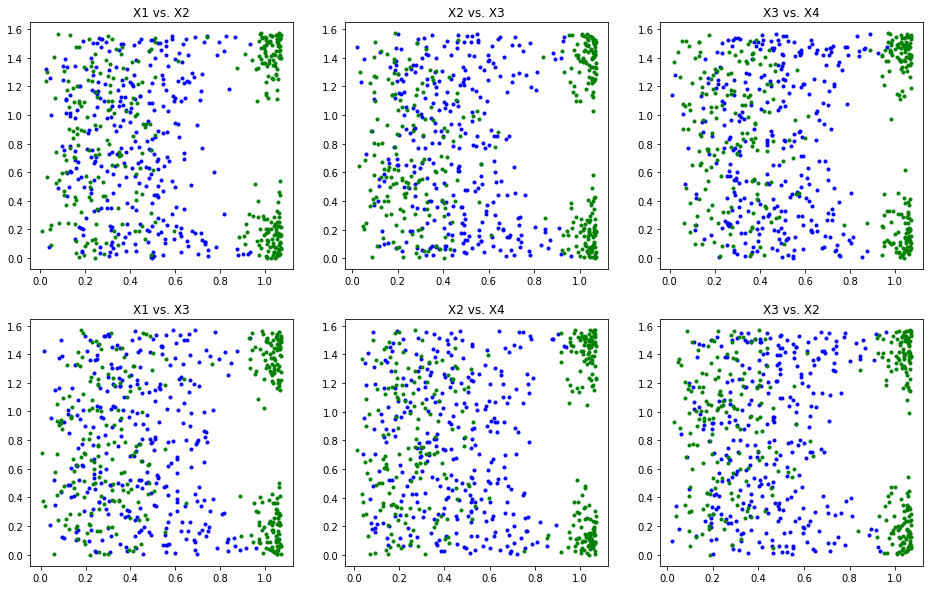

In [14]:
fix, ax = plt.subplots(2,3, figsize=(16,10))
for i,j in product(range(2), range(3)):
    for cat,color in [(Adata,'blue'), (Bdata,'green')]:
        delme = cat.iloc[:,idx_map[i,j]]
        ax[i, j].plot(np.linalg.norm(delme, axis=1), np.arctan2(delme.iloc[:,0], delme.iloc[:,1]), '.', color=color)[0]
        ax[i, j].set_title('X{} vs. X{}'.format(*(idx_map[i,j]+1)))
# fig.axes.xaxis.set_ticks(np.linspace(np.pi/6, np.pi/2, 7)) 

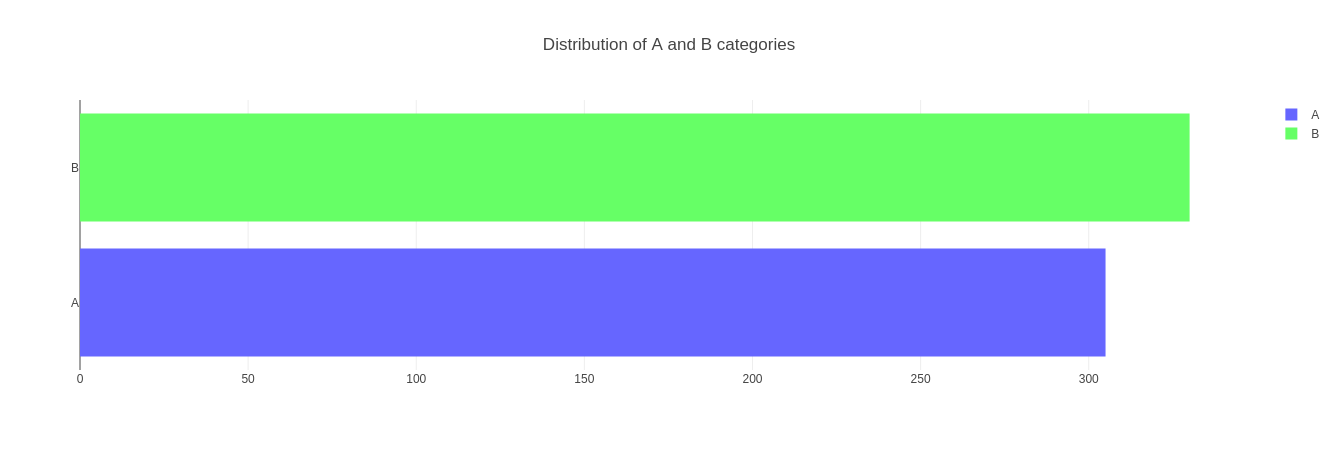

In [15]:
counts = data.groupby('Category').Category.count()
fig = { 'data': [
    go.Bar(x = [x],
           y = [y],
           name = y,
           orientation = 'h',
           marker = {'color': {'A': '#6666ff', 'B': '#66ff66'}[y]}
          ) for y,x in list(counts.items())],
    'layout': {
        'title': 'Distribution of A and B categories',
        'width': 5
    }
}

go.Layout()

ply.offline.iplot(fig, validate=False)

In [16]:
import scipy.linalg as LA

In [17]:
A = np.identity(4)
A[:,0] = 0.25 * np.ones((4))
for i in range(0,4):
    for j in range(0,i):
        A[:,i] -= A[:,i].T @ A[:,j]
    A[:,i] /= LA.norm(A[:,i])
A

array([[ 0.5, -0.5, -0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [18]:
A = np.eye(4, 3, -1) - 0.5

print(A.T @ A)
print(A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5]
 [-0.5  0.5 -0.5]
 [-0.5 -0.5  0.5]]


In [122]:
coord_cols = header[:-1]
Adata_projected = Adata[coord_cols].dot(A/1.11) + 0.5
coord_cols_proj = ['Y1', 'Y2', 'Y3']
Adata_projected.columns = coord_cols_proj

_convolver = np.array([1,1,1])
Adata_projected['fromOrigin'] = Adata_projected[coord_cols_proj].dot(_convolver)

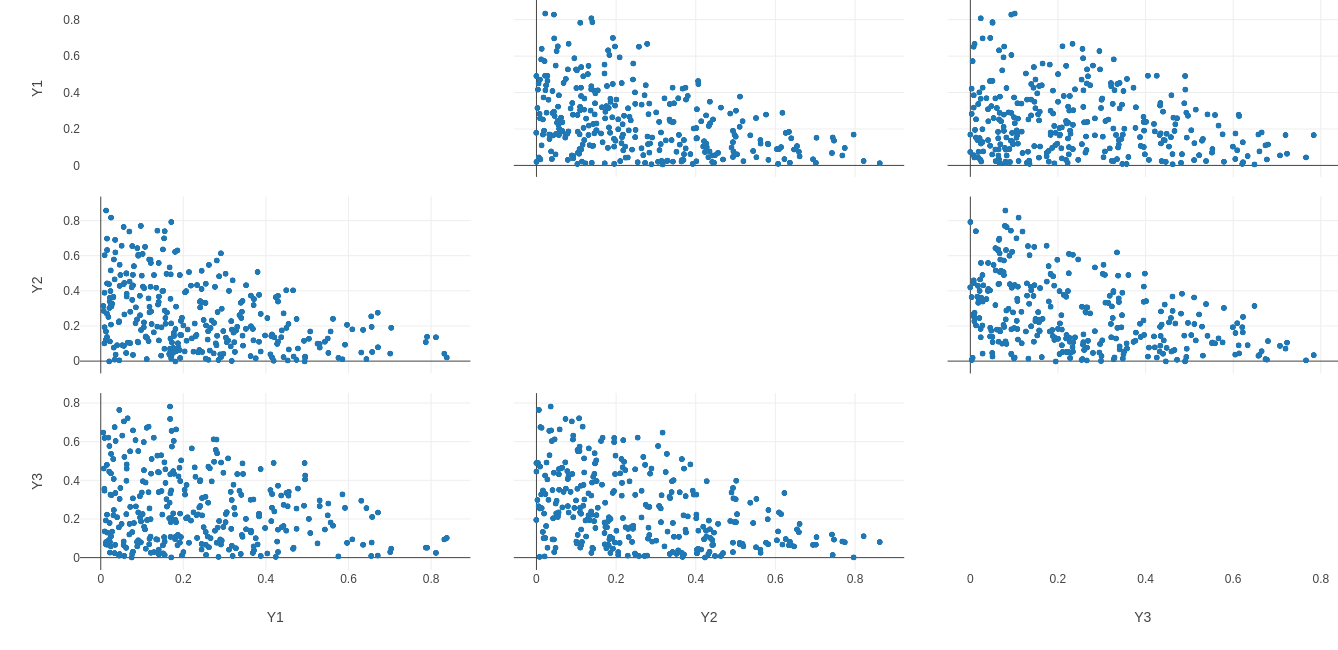

In [204]:
fig = go.Figure( 
    data = [ go.Splom(
        dimensions = [{'label': colname, 'values': col.values} for colname,col in Adata_projected.items() if colname[0] == 'Y'],
        diagonal = {'visible': False}
    ) ],
    layout = go.Layout(
        autosize = False,
        height = 650,
        width = 650,
        margin = {side: 0 for side in 'tr'},
        paper_bgcolor = 'rgba(0,0,0,0)',
        plot_bgcolor = 'rgba(0,0,0,0)'
    )
)

ply.offline.iplot(fig, validate=False)

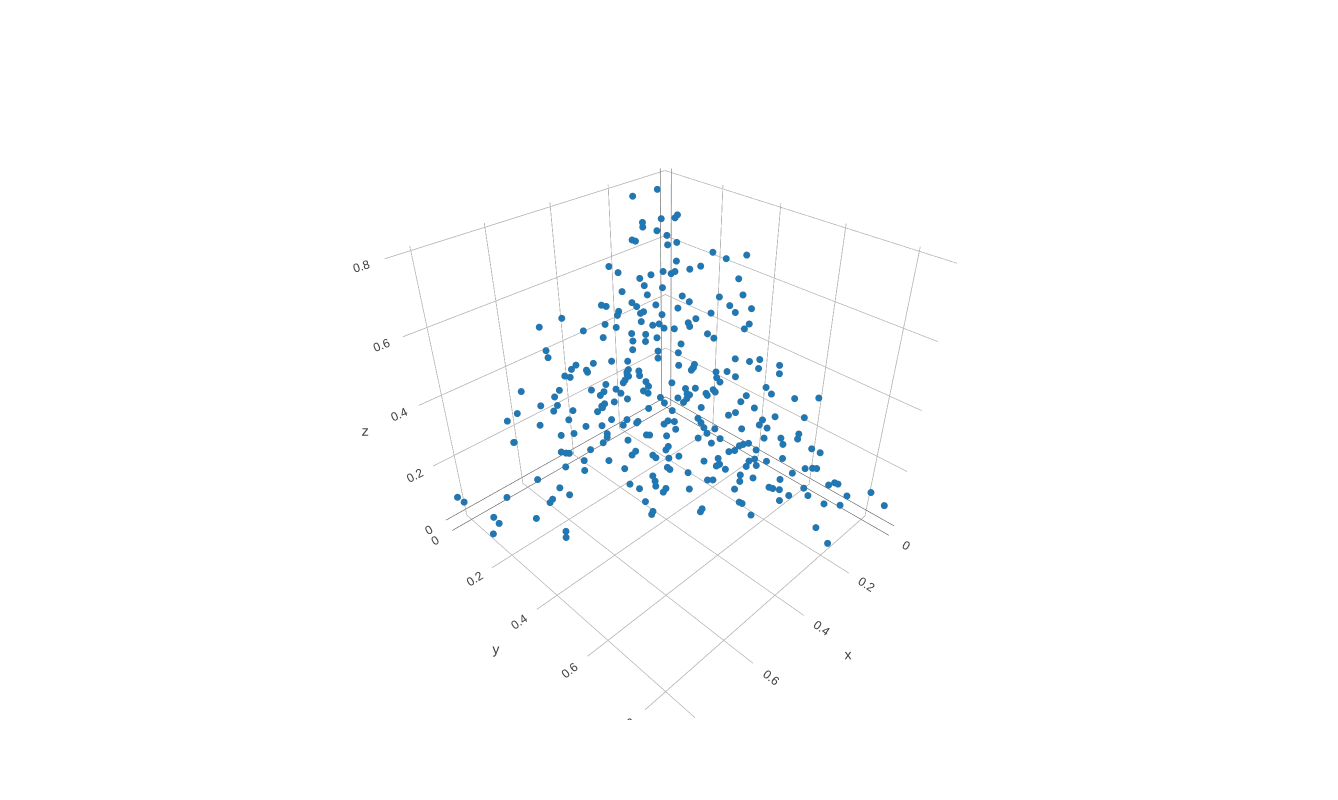

In [23]:
fig = go.Figure( 
    data = [ go.Scatter3d( {
        'xyz'[i]: Adata_projected['Y{}'.format(i+1)] for i in range(3)
    },
        mode = 'markers',
        marker = go.scatter3d.Marker(
            size = 4,
            
        )
    ) ],
    layout = go.Layout(
#         autosize = False,
        height = 800,
#         width = 500
    )
)

ply.offline.iplot(fig, validate=False)

In [229]:
help(plt.Axes.set_facecolor)

Help on function set_facecolor in module matplotlib.axes._base:

set_facecolor(self, color)
    Set the facecolor of the Axes.
    
    Parameters
    ----------
    color : color



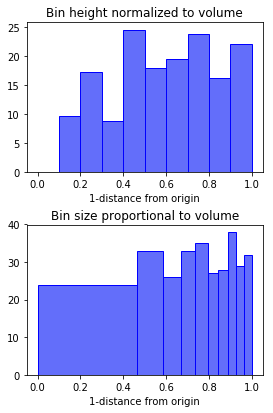

In [232]:
fix, ax = plt.subplots(2,1, figsize=(4,5.5))
plt.tight_layout()
plt.subplots_adjust(hspace=0.35, top=0.96, bottom=0.07)

heights,bins = np.histogram(Adata_projected.fromOrigin, bins=np.linspace(0., 1., 11), range=(0.,1.))
# print(heights)
heights = heights / ( (bins[1:] + bins[:-1])**2 * (2/np.sqrt(3)) )
# print(heights); print(bins)
ax[0].bar(bins[:-1], heights, width=.1, align='edge',
       linewidth=1, edgecolor='blue', color=Acolor)
ax[0].set_title('Bin height normalized to volume')
ax[0].set_xlabel('1-distance from origin')
ax[0].set_facecolor('#00000000')


heights,bins = np.histogram(Adata_projected.fromOrigin, bins=np.linspace(0., 1., 11)**(1/3), range=(0.,1.))
# print(heights); print(bins)
ax[1].bar(bins[:-1], heights, width=bins[1:]-bins[:-1], align='edge',
       linewidth=1, edgecolor='blue', color=Acolor)
ax[1].set_title('Bin size proportional to volume')
ax[1].set_xlabel('1-distance from origin')
ax[0].set_facecolor('#00000000')

plt.savefig('Hists_anon_Aproj.png')
None

In [192]:
_remove_max = lambda v : np.delete(v, np.argmax(v))
coord_cols_proj = ['Y1', 'Y2', 'Y3']

coord_cols = header[:-1]
Bdata_projected = pd.DataFrame(np.array([_remove_max(r.values)/1.07 for _,r in Bdata[coord_cols].iterrows()]),
                               columns=coord_cols_proj)

In [194]:
Bdata_projected.head()

,Y1,Y2,Y3
0,0.000043,0.206748,0.051273
1,0.000355,0.229639,0.055287
2,0.001299,0.160979,0.080946
3,0.001822,0.009356,0.262525
4,0.001985,0.279911,0.055048


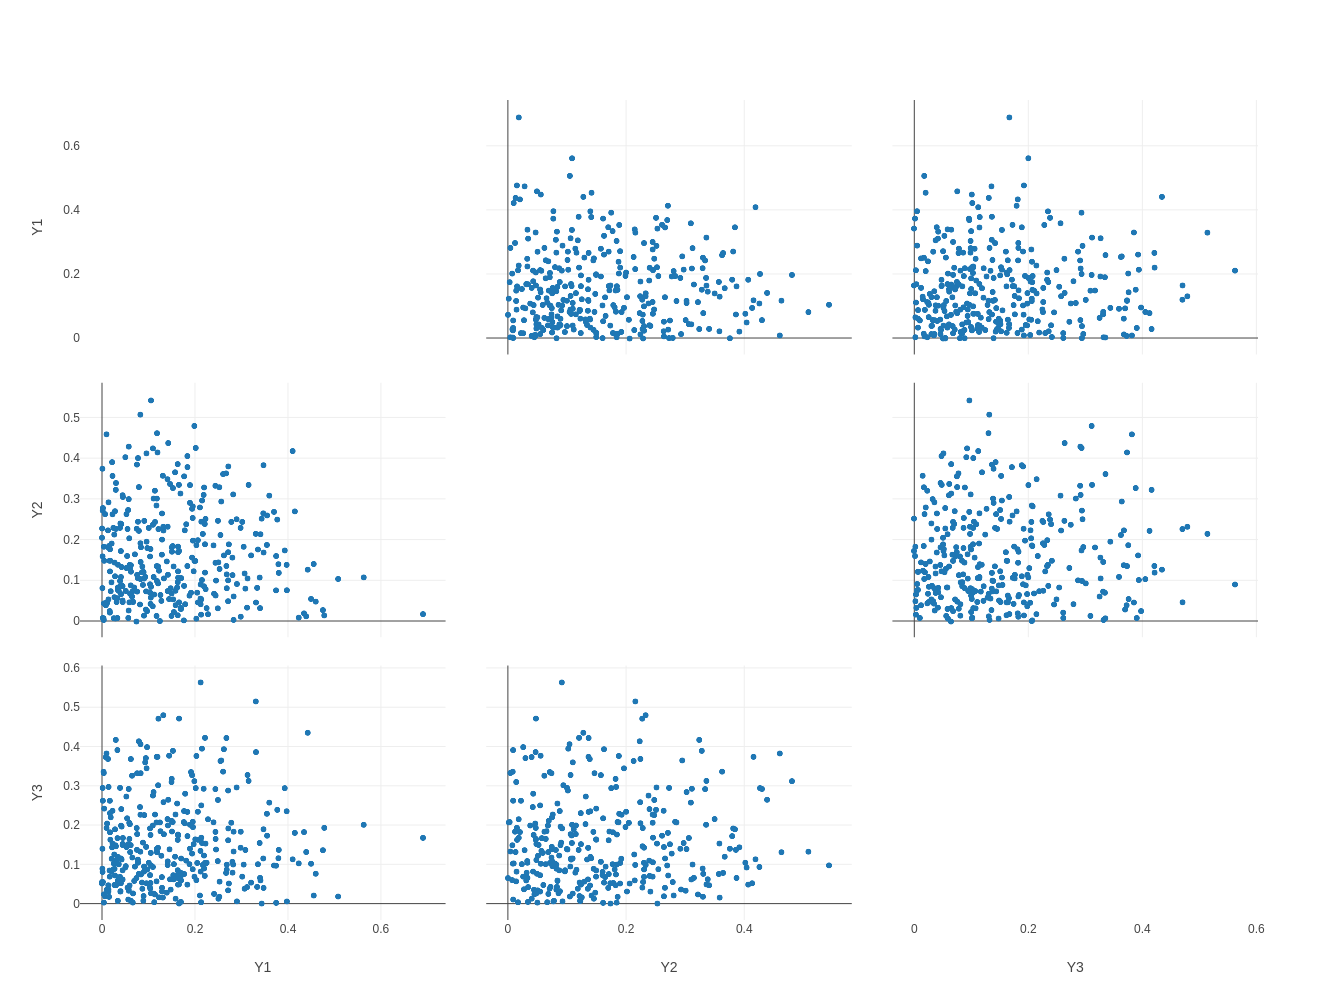

In [195]:
fig = go.Figure( 
    data = [ go.Splom(
        dimensions = [{'label': colname, 'values': col.values} for colname,col in Bdata_projected.items() if colname[0] == 'Y'],
        diagonal = {'visible': False}
    ) ],
    layout = go.Layout(
        autosize = False,
        height = 1000,
        width = 1000
    )
)

ply.offline.iplot(fig, validate=False)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>